In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import cv2, os

In [0]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [0]:
header = ['no', 'id', 'iso', 'class','label']

from google.colab import files
uploaded = files.upload()

Saving dasetallclass.csv to dasetallclass (1).csv


In [0]:
import io
dtLabel = pd.read_csv(io.BytesIO(uploaded['dasetallclass.csv']))

#dataset is now stored in a pandas dataframe
dtLabel

,no,id,iso,class,label
0,1,DSCF0903.JPG,400,specialty,0
1,2,DSCF0900.JPG,800,specialty,0
2,3,DSCF0904.JPG,1250,specialty,0
3,4,DSCF0905.JPG,400,specialty,0
4,5,DSCF0910.JPG,800,specialty,0
...,...,...,...,...,...
895,896,DSCF2197.JPG,800,off,4
896,897,DSCF2198.JPG,1250,off,4
897,898,DSCF2200.JPG,400,off,4
898,899,DSCF2201.JPG,800,off,4


In [0]:
width = 265#1920#530#265
height = 265#149#1024#298#149

In [0]:
listId = dtLabel['id'] #dari dataset

# train == dtLabel

### COBA UBAH KAYAK YANG BAWAH

import glob
image_list = []
arrayImages = []
for i in tqdm(range(dtLabel.shape[0])):
  img = image.load_img('drive/My Drive/dataset_coffee/dasetallclass/' + dtLabel['id'][i])
  print(img)
  img = img.resize((width, height))#.convert('L') #265:149
  #img = np.array(img)
  image_list.append(img)
  img = np.array(img)
  arrayImages.append(img)

label = dtLabel['label']

  0%|          | 0/900 [00:00<?, ?it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6F6518>


  0%|          | 1/900 [00:00<04:57,  3.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70D518>


  0%|          | 2/900 [00:00<04:43,  3.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70D518>


  0%|          | 3/900 [00:00<04:38,  3.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6F6518>


  0%|          | 4/900 [00:01<04:31,  3.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F769128>


  1%|          | 5/900 [00:01<04:25,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70C2E8>


  1%|          | 6/900 [00:01<04:21,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70D860>


  1%|          | 7/900 [00:02<04:17,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70BF60>


  1%|          | 8/900 [00:02<04:13,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70C2E8>


  1%|          | 9/900 [00:02<04:16,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6FA2E8>


  1%|          | 10/900 [00:02<04:15,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7690F0>


  1%|          | 11/900 [00:03<04:20,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F710C18>


  1%|▏         | 12/900 [00:03<04:21,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7104E0>


  1%|▏         | 13/900 [00:03<04:17,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70C8D0>


  2%|▏         | 14/900 [00:04<04:18,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F710B00>


  2%|▏         | 15/900 [00:04<04:18,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F710C18>


  2%|▏         | 16/900 [00:04<04:15,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7108D0>


  2%|▏         | 17/900 [00:04<04:15,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7108D0>


  2%|▏         | 18/900 [00:05<04:17,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7104E0>


  2%|▏         | 19/900 [00:05<04:14,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70EF98>


  2%|▏         | 20/900 [00:05<04:13,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70EBA8>


  2%|▏         | 21/900 [00:06<04:18,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70EE10>


  2%|▏         | 22/900 [00:06<04:13,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70E390>


  3%|▎         | 23/900 [00:06<04:12,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70EA90>


  3%|▎         | 24/900 [00:06<04:16,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70EFD0>


  3%|▎         | 25/900 [00:07<04:11,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70E240>


  3%|▎         | 26/900 [00:07<04:11,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70E400>


  3%|▎         | 27/900 [00:07<04:15,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70EFD0>


  3%|▎         | 28/900 [00:08<04:12,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70E7F0>


  3%|▎         | 29/900 [00:08<04:10,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70EE80>


  3%|▎         | 30/900 [00:08<04:11,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70E400>


  3%|▎         | 31/900 [00:08<04:10,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70ECC0>


  4%|▎         | 32/900 [00:09<04:07,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70E8D0>


  4%|▎         | 33/900 [00:09<04:09,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70EBA8>


  4%|▍         | 34/900 [00:09<04:06,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70ECC0>


  4%|▍         | 35/900 [00:10<04:10,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70E7F0>


  4%|▍         | 36/900 [00:10<04:11,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70E7F0>


  4%|▍         | 37/900 [00:10<04:08,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646748>


  4%|▍         | 38/900 [00:11<04:08,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6466A0>


  4%|▍         | 39/900 [00:11<04:10,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646C50>


  4%|▍         | 40/900 [00:11<04:03,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6469E8>


  5%|▍         | 41/900 [00:11<04:01,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6464A8>


  5%|▍         | 42/900 [00:12<04:04,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646828>


  5%|▍         | 43/900 [00:12<04:01,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646F98>


  5%|▍         | 44/900 [00:12<04:01,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6464A8>


  5%|▌         | 45/900 [00:12<04:06,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646B38>


  5%|▌         | 46/900 [00:13<04:05,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646BA8>


  5%|▌         | 47/900 [00:13<04:03,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646BE0>


  5%|▌         | 48/900 [00:13<04:04,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646D30>


  5%|▌         | 49/900 [00:14<04:05,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646DD8>


  6%|▌         | 50/900 [00:14<04:02,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646400>


  6%|▌         | 51/900 [00:14<04:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646438>


  6%|▌         | 52/900 [00:15<04:02,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6462E8>


  6%|▌         | 53/900 [00:15<04:03,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646FD0>


  6%|▌         | 54/900 [00:15<04:04,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646630>


  6%|▌         | 55/900 [00:15<03:59,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646B00>


  6%|▌         | 56/900 [00:16<04:00,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646E48>


  6%|▋         | 57/900 [00:16<03:58,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646668>


  6%|▋         | 58/900 [00:16<03:55,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646898>


  7%|▋         | 59/900 [00:16<03:53,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646208>


  7%|▋         | 60/900 [00:17<03:55,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6467B8>


  7%|▋         | 61/900 [00:17<03:50,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6466D8>


  7%|▋         | 62/900 [00:17<03:52,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64DE10>


  7%|▋         | 63/900 [00:18<03:55,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646E80>


  7%|▋         | 64/900 [00:18<03:51,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D518>


  7%|▋         | 65/900 [00:18<03:50,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D6A0>


  7%|▋         | 66/900 [00:18<03:52,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD81A58>


  7%|▋         | 67/900 [00:19<03:53,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646A58>


  8%|▊         | 68/900 [00:19<03:53,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DDFD8D0>


  8%|▊         | 69/900 [00:19<04:02,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DDFD908>


  8%|▊         | 70/900 [00:20<04:06,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646898>


  8%|▊         | 71/900 [00:20<04:05,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646320>


  8%|▊         | 72/900 [00:20<04:05,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646898>


  8%|▊         | 73/900 [00:20<04:02,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6463C8>


  8%|▊         | 74/900 [00:21<04:05,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646978>


  8%|▊         | 75/900 [00:21<04:11,  3.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DDCC550>


  8%|▊         | 76/900 [00:21<04:08,  3.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DDCC828>


  9%|▊         | 77/900 [00:22<04:11,  3.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DDCC940>


  9%|▊         | 78/900 [00:22<04:16,  3.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DDCC550>


  9%|▉         | 79/900 [00:22<04:12,  3.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DDCC780>


  9%|▉         | 80/900 [00:23<04:10,  3.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D5F8>


  9%|▉         | 81/900 [00:23<04:19,  3.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6460B8>


  9%|▉         | 82/900 [00:23<04:15,  3.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6464E0>


  9%|▉         | 83/900 [00:24<04:15,  3.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646080>


  9%|▉         | 84/900 [00:24<04:15,  3.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646860>


  9%|▉         | 85/900 [00:24<04:08,  3.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646978>


 10%|▉         | 86/900 [00:25<04:06,  3.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646080>


 10%|▉         | 87/900 [00:25<04:13,  3.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F646208>


 10%|▉         | 88/900 [00:25<04:07,  3.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F70E6A0>


 10%|▉         | 89/900 [00:25<04:11,  3.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64DEF0>


 10%|█         | 90/900 [00:26<04:13,  3.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64DD30>


 10%|█         | 91/900 [00:26<04:09,  3.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D2B0>


 10%|█         | 92/900 [00:26<04:06,  3.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D128>


 10%|█         | 93/900 [00:27<04:06,  3.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64DE48>


 10%|█         | 94/900 [00:27<04:04,  3.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64DA20>


 11%|█         | 95/900 [00:27<04:02,  3.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D5F8>


 11%|█         | 96/900 [00:28<04:04,  3.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79E80>


 11%|█         | 97/900 [00:28<04:07,  3.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64DE48>


 11%|█         | 98/900 [00:28<04:11,  3.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D470>


 11%|█         | 99/900 [00:29<04:11,  3.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64DD30>


 11%|█         | 100/900 [00:29<04:04,  3.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D588>


 11%|█         | 101/900 [00:29<04:05,  3.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD796A0>


 11%|█▏        | 102/900 [00:29<04:05,  3.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D8D0>


 11%|█▏        | 103/900 [00:30<04:01,  3.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D128>


 12%|█▏        | 104/900 [00:30<03:58,  3.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64DE80>


 12%|█▏        | 105/900 [00:30<03:56,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD6F550>


 12%|█▏        | 106/900 [00:31<03:53,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79A20>


 12%|█▏        | 107/900 [00:31<03:50,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD6FC88>


 12%|█▏        | 108/900 [00:31<03:51,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79828>


 12%|█▏        | 109/900 [00:31<03:48,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD6F860>


 12%|█▏        | 110/900 [00:32<03:46,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DE3ED68>


 12%|█▏        | 111/900 [00:32<03:51,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DE3E898>


 12%|█▏        | 112/900 [00:32<03:45,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD6F8D0>


 13%|█▎        | 113/900 [00:33<03:44,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD6FE48>


 13%|█▎        | 114/900 [00:33<03:45,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD6FD68>


 13%|█▎        | 115/900 [00:33<03:44,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD6FC18>


 13%|█▎        | 116/900 [00:33<03:44,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD6FE48>


 13%|█▎        | 117/900 [00:34<03:45,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD652E8>


 13%|█▎        | 118/900 [00:34<03:44,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD65AC8>


 13%|█▎        | 119/900 [00:34<03:43,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD65780>


 13%|█▎        | 120/900 [00:35<03:44,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD6FC18>


 13%|█▎        | 121/900 [00:35<03:41,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD6F0B8>


 14%|█▎        | 122/900 [00:35<03:41,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD6FE48>


 14%|█▎        | 123/900 [00:35<03:44,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD65780>


 14%|█▍        | 124/900 [00:36<03:41,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD65780>


 14%|█▍        | 125/900 [00:36<03:43,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79780>


 14%|█▍        | 126/900 [00:36<03:44,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64DE48>


 14%|█▍        | 127/900 [00:37<03:42,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D8D0>


 14%|█▍        | 128/900 [00:37<03:42,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64DA20>


 14%|█▍        | 129/900 [00:37<03:45,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64DE48>


 14%|█▍        | 130/900 [00:38<03:43,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64DA20>


 15%|█▍        | 131/900 [00:38<03:41,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D198>


 15%|█▍        | 132/900 [00:38<03:44,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D5F8>


 15%|█▍        | 133/900 [00:38<03:39,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D8D0>


 15%|█▍        | 134/900 [00:39<03:39,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D198>


 15%|█▌        | 135/900 [00:39<03:40,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D5F8>


 15%|█▌        | 136/900 [00:39<03:39,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F64D588>


 15%|█▌        | 137/900 [00:40<03:38,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79FD0>


 15%|█▌        | 138/900 [00:40<03:41,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79BA8>


 15%|█▌        | 139/900 [00:40<03:39,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79EB8>


 16%|█▌        | 140/900 [00:40<03:39,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79C50>


 16%|█▌        | 141/900 [00:41<03:39,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79EF0>


 16%|█▌        | 142/900 [00:41<03:35,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79470>


 16%|█▌        | 143/900 [00:41<03:38,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79BE0>


 16%|█▌        | 144/900 [00:42<03:37,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79C88>


 16%|█▌        | 145/900 [00:42<03:35,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79470>


 16%|█▌        | 146/900 [00:42<03:33,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79898>


 16%|█▋        | 147/900 [00:42<03:38,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79CF8>


 16%|█▋        | 148/900 [00:43<03:34,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79BE0>


 17%|█▋        | 149/900 [00:43<03:34,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD790F0>


 17%|█▋        | 150/900 [00:43<03:37,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79CF8>


 17%|█▋        | 151/900 [00:44<03:34,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79470>


 17%|█▋        | 152/900 [00:44<03:34,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD790F0>


 17%|█▋        | 153/900 [00:44<03:34,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79C50>


 17%|█▋        | 154/900 [00:44<03:34,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D128>


 17%|█▋        | 155/900 [00:45<03:32,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D8D0>


 17%|█▋        | 156/900 [00:45<03:33,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D2E8>


 17%|█▋        | 157/900 [00:45<03:32,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D2B0>


 18%|█▊        | 158/900 [00:46<03:37,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D320>


 18%|█▊        | 159/900 [00:46<03:36,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DD79128>


 18%|█▊        | 160/900 [00:46<03:30,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DDFD710>


 18%|█▊        | 161/900 [00:46<03:30,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DDFD710>


 18%|█▊        | 162/900 [00:47<03:32,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8DDFD710>


 18%|█▊        | 163/900 [00:47<03:32,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D860>


 18%|█▊        | 164/900 [00:47<03:30,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76DAC8>


 18%|█▊        | 165/900 [00:48<03:34,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D3C8>


 18%|█▊        | 166/900 [00:48<03:31,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D828>


 19%|█▊        | 167/900 [00:48<03:29,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76DF60>


 19%|█▊        | 168/900 [00:48<03:31,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D208>


 19%|█▉        | 169/900 [00:49<03:27,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76DCC0>


 19%|█▉        | 170/900 [00:49<03:24,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D978>


 19%|█▉        | 171/900 [00:49<03:26,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D748>


 19%|█▉        | 172/900 [00:50<03:26,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D390>


 19%|█▉        | 173/900 [00:50<03:24,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76DEF0>


 19%|█▉        | 174/900 [00:50<03:26,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D0B8>


 19%|█▉        | 175/900 [00:50<03:25,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D9B0>


 20%|█▉        | 176/900 [00:51<03:23,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D1D0>


 20%|█▉        | 177/900 [00:51<03:23,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76DD68>


 20%|█▉        | 178/900 [00:51<03:20,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D4A8>


 20%|█▉        | 179/900 [00:52<03:23,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76DB38>


 20%|██        | 180/900 [00:52<03:24,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D8D0>


 20%|██        | 181/900 [00:52<03:22,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D438>


 20%|██        | 182/900 [00:52<03:20,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76DDA0>


 20%|██        | 183/900 [00:53<03:22,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D048>


 20%|██        | 184/900 [00:53<03:18,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76DEB8>


 21%|██        | 185/900 [00:53<03:17,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D160>


 21%|██        | 186/900 [00:53<03:23,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76DA90>


 21%|██        | 187/900 [00:54<03:21,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D588>


 21%|██        | 188/900 [00:54<03:20,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D048>


 21%|██        | 189/900 [00:54<03:21,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76DEB8>


 21%|██        | 190/900 [00:55<03:21,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D160>


 21%|██        | 191/900 [00:55<03:19,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D5F8>


 21%|██▏       | 192/900 [00:55<03:19,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D8D0>


 21%|██▏       | 193/900 [00:55<03:17,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D160>


 22%|██▏       | 194/900 [00:56<03:19,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D160>


 22%|██▏       | 195/900 [00:56<03:19,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F76D588>


 22%|██▏       | 196/900 [00:56<03:15,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638898>


 22%|██▏       | 197/900 [00:57<03:17,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638C50>


 22%|██▏       | 198/900 [00:57<03:18,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638828>


 22%|██▏       | 199/900 [00:57<03:15,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638160>


 22%|██▏       | 200/900 [00:57<03:13,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638A58>


 22%|██▏       | 201/900 [00:58<03:17,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638E80>


 22%|██▏       | 202/900 [00:58<03:14,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638A90>


 23%|██▎       | 203/900 [00:58<03:13,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638860>


 23%|██▎       | 204/900 [00:59<03:15,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638400>


 23%|██▎       | 205/900 [00:59<03:15,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6381D0>


 23%|██▎       | 206/900 [00:59<03:13,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638320>


 23%|██▎       | 207/900 [00:59<03:13,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638438>


 23%|██▎       | 208/900 [01:00<03:14,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638198>


 23%|██▎       | 209/900 [01:00<03:12,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638E10>


 23%|██▎       | 210/900 [01:00<03:13,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638E48>


 23%|██▎       | 211/900 [01:01<03:12,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6380F0>


 24%|██▎       | 212/900 [01:01<03:13,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638D30>


 24%|██▎       | 213/900 [01:01<03:13,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638A20>


 24%|██▍       | 214/900 [01:01<03:11,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638B00>


 24%|██▍       | 215/900 [01:02<03:11,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638470>


 24%|██▍       | 216/900 [01:02<03:15,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638C18>


 24%|██▍       | 217/900 [01:02<03:12,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638518>


 24%|██▍       | 218/900 [01:02<03:12,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638CF8>


 24%|██▍       | 219/900 [01:03<03:17,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638B38>


 24%|██▍       | 220/900 [01:03<03:14,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638DA0>


 25%|██▍       | 221/900 [01:03<03:12,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638128>


 25%|██▍       | 222/900 [01:04<03:14,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638358>


 25%|██▍       | 223/900 [01:04<03:13,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638D68>


 25%|██▍       | 224/900 [01:04<03:12,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638B38>


 25%|██▌       | 225/900 [01:05<03:14,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638DA0>


 25%|██▌       | 226/900 [01:05<03:17,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638128>


 25%|██▌       | 227/900 [01:05<03:13,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638358>


 25%|██▌       | 228/900 [01:05<03:13,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638CF8>


 25%|██▌       | 229/900 [01:06<03:10,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638128>


 26%|██▌       | 230/900 [01:06<03:10,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F638128>


 26%|██▌       | 231/900 [01:06<03:14,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644908>


 26%|██▌       | 232/900 [01:07<03:12,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644630>


 26%|██▌       | 233/900 [01:07<03:12,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6440B8>


 26%|██▌       | 234/900 [01:07<03:13,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644A58>


 26%|██▌       | 235/900 [01:07<03:10,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644390>


 26%|██▌       | 236/900 [01:08<03:09,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644198>


 26%|██▋       | 237/900 [01:08<03:12,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644BA8>


 26%|██▋       | 238/900 [01:08<03:08,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644DA0>


 27%|██▋       | 239/900 [01:09<03:08,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644E10>


 27%|██▋       | 240/900 [01:09<03:08,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644048>


 27%|██▋       | 241/900 [01:09<03:09,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644D68>


 27%|██▋       | 242/900 [01:09<03:07,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644EB8>


 27%|██▋       | 243/900 [01:10<03:08,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644DD8>


 27%|██▋       | 244/900 [01:10<03:07,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6446D8>


 27%|██▋       | 245/900 [01:10<03:07,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644EB8>


 27%|██▋       | 246/900 [01:11<03:08,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644518>


 27%|██▋       | 247/900 [01:11<03:04,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6447F0>


 28%|██▊       | 248/900 [01:11<03:05,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644400>


 28%|██▊       | 249/900 [01:11<03:07,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644B38>


 28%|██▊       | 250/900 [01:12<03:04,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644470>


 28%|██▊       | 251/900 [01:12<03:04,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644E48>


 28%|██▊       | 252/900 [01:12<03:06,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644A90>


 28%|██▊       | 253/900 [01:13<03:04,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644B70>


 28%|██▊       | 254/900 [01:13<03:03,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644FD0>


 28%|██▊       | 255/900 [01:13<03:06,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644710>


 28%|██▊       | 256/900 [01:13<03:04,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644080>


 29%|██▊       | 257/900 [01:14<03:03,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644CC0>


 29%|██▊       | 258/900 [01:14<03:06,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644B70>


 29%|██▉       | 259/900 [01:14<03:03,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644F28>


 29%|██▉       | 260/900 [01:15<03:02,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644F98>


 29%|██▉       | 261/900 [01:15<03:03,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644160>


 29%|██▉       | 262/900 [01:15<03:04,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644CC0>


 29%|██▉       | 263/900 [01:15<03:02,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644588>


 29%|██▉       | 264/900 [01:16<03:03,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6442B0>


 29%|██▉       | 265/900 [01:16<03:00,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644CC0>


 30%|██▉       | 266/900 [01:16<03:02,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644FD0>


 30%|██▉       | 267/900 [01:17<03:03,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F644CC0>


 30%|██▉       | 268/900 [01:17<03:02,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631C88>


 30%|██▉       | 269/900 [01:17<03:02,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631438>


 30%|███       | 270/900 [01:17<03:03,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631048>


 30%|███       | 271/900 [01:18<03:00,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6319E8>


 30%|███       | 272/900 [01:18<02:59,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631BA8>


 30%|███       | 273/900 [01:18<03:04,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6314A8>


 30%|███       | 274/900 [01:19<03:01,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631240>


 31%|███       | 275/900 [01:19<02:59,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631CF8>


 31%|███       | 276/900 [01:19<03:01,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6314A8>


 31%|███       | 277/900 [01:19<03:00,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6314E0>


 31%|███       | 278/900 [01:20<02:58,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631208>


 31%|███       | 279/900 [01:20<02:58,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6315C0>


 31%|███       | 280/900 [01:20<02:57,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631470>


 31%|███       | 281/900 [01:21<02:58,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631B00>


 31%|███▏      | 282/900 [01:21<02:58,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631400>


 31%|███▏      | 283/900 [01:21<02:56,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631470>


 32%|███▏      | 284/900 [01:21<02:55,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631AC8>


 32%|███▏      | 285/900 [01:22<02:57,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631400>


 32%|███▏      | 286/900 [01:22<02:53,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631DA0>


 32%|███▏      | 287/900 [01:22<02:57,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631278>


 32%|███▏      | 288/900 [01:23<02:58,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631898>


 32%|███▏      | 289/900 [01:23<02:54,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6319B0>


 32%|███▏      | 290/900 [01:23<02:53,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631A58>


 32%|███▏      | 291/900 [01:23<02:55,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631E10>


 32%|███▏      | 292/900 [01:24<02:52,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631E80>


 33%|███▎      | 293/900 [01:24<02:52,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631A20>


 33%|███▎      | 294/900 [01:24<02:55,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631710>


 33%|███▎      | 295/900 [01:25<02:52,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6313C8>


 33%|███▎      | 296/900 [01:25<02:55,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631128>


 33%|███▎      | 297/900 [01:25<02:55,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631E10>


 33%|███▎      | 298/900 [01:25<02:53,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631BE0>


 33%|███▎      | 299/900 [01:26<02:55,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631A58>


 33%|███▎      | 300/900 [01:26<02:54,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631E80>


 33%|███▎      | 301/900 [01:26<02:53,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631E80>


 34%|███▎      | 302/900 [01:27<02:52,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F631710>


 34%|███▎      | 303/900 [01:27<02:52,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E470>


 34%|███▍      | 304/900 [01:27<02:50,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E048>


 34%|███▍      | 305/900 [01:27<02:51,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63EDA0>


 34%|███▍      | 306/900 [01:28<02:53,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E9B0>


 34%|███▍      | 307/900 [01:28<02:52,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E048>


 34%|███▍      | 308/900 [01:28<02:52,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E438>


 34%|███▍      | 309/900 [01:29<02:54,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E6D8>


 34%|███▍      | 310/900 [01:29<02:50,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E080>


 35%|███▍      | 311/900 [01:29<02:48,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63EC88>


 35%|███▍      | 312/900 [01:30<02:51,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E198>


 35%|███▍      | 313/900 [01:30<02:48,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E278>


 35%|███▍      | 314/900 [01:30<02:46,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E940>


 35%|███▌      | 315/900 [01:30<02:50,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E7F0>


 35%|███▌      | 316/900 [01:31<02:47,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E978>


 35%|███▌      | 317/900 [01:31<02:47,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63EF60>


 35%|███▌      | 318/900 [01:31<02:48,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63EBA8>


 35%|███▌      | 319/900 [01:32<02:46,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E240>


 36%|███▌      | 320/900 [01:32<02:44,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E6A0>


 36%|███▌      | 321/900 [01:32<02:45,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E1D0>


 36%|███▌      | 322/900 [01:32<02:46,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E668>


 36%|███▌      | 323/900 [01:33<02:46,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E160>


 36%|███▌      | 324/900 [01:33<02:47,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E240>


 36%|███▌      | 325/900 [01:33<02:46,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E2B0>


 36%|███▌      | 326/900 [01:34<02:46,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E5C0>


 36%|███▋      | 327/900 [01:34<02:45,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E7B8>


 36%|███▋      | 328/900 [01:34<02:43,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E710>


 37%|███▋      | 329/900 [01:34<02:43,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E4A8>


 37%|███▋      | 330/900 [01:35<02:47,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E7B8>


 37%|███▋      | 331/900 [01:35<02:44,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63EE10>


 37%|███▋      | 332/900 [01:35<02:43,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E358>


 37%|███▋      | 333/900 [01:36<02:47,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E2B0>


 37%|███▋      | 334/900 [01:36<02:44,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E4A8>


 37%|███▋      | 335/900 [01:36<02:41,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E908>


 37%|███▋      | 336/900 [01:36<02:41,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E4E0>


 37%|███▋      | 337/900 [01:37<02:42,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F63E4E0>


 38%|███▊      | 338/900 [01:37<02:41,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712CC0>


 38%|███▊      | 339/900 [01:37<02:42,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712D30>


 38%|███▊      | 340/900 [01:38<02:41,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7122B0>


 38%|███▊      | 341/900 [01:38<02:43,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712BA8>


 38%|███▊      | 342/900 [01:38<02:42,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712B38>


 38%|███▊      | 343/900 [01:38<02:40,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712358>


 38%|███▊      | 344/900 [01:39<02:42,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712668>


 38%|███▊      | 345/900 [01:39<02:42,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712400>


 38%|███▊      | 346/900 [01:39<02:41,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712208>


 39%|███▊      | 347/900 [01:40<02:40,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7127F0>


 39%|███▊      | 348/900 [01:40<02:39,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712390>


 39%|███▉      | 349/900 [01:40<02:38,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7125F8>


 39%|███▉      | 350/900 [01:41<02:37,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712FD0>


 39%|███▉      | 351/900 [01:41<02:39,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712160>


 39%|███▉      | 352/900 [01:41<02:36,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712F60>


 39%|███▉      | 353/900 [01:41<02:37,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712588>


 39%|███▉      | 354/900 [01:42<02:40,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712E80>


 39%|███▉      | 355/900 [01:42<02:36,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712E48>


 40%|███▉      | 356/900 [01:42<02:35,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712EB8>


 40%|███▉      | 357/900 [01:43<02:36,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7123C8>


 40%|███▉      | 358/900 [01:43<02:36,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712EF0>


 40%|███▉      | 359/900 [01:43<02:34,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7126A0>


 40%|████      | 360/900 [01:43<02:35,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712748>


 40%|████      | 361/900 [01:44<02:34,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712710>


 40%|████      | 362/900 [01:44<02:35,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712F98>


 40%|████      | 363/900 [01:44<02:35,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712A90>


 40%|████      | 364/900 [01:45<02:33,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712978>


 41%|████      | 365/900 [01:45<02:34,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7122E8>


 41%|████      | 366/900 [01:45<02:35,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712198>


 41%|████      | 367/900 [01:45<02:35,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712550>


 41%|████      | 368/900 [01:46<02:34,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712898>


 41%|████      | 369/900 [01:46<02:34,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712A90>


 41%|████      | 370/900 [01:46<02:32,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7122E8>


 41%|████      | 371/900 [01:47<02:31,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712198>


 41%|████▏     | 372/900 [01:47<02:35,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712A90>


 41%|████▏     | 373/900 [01:47<02:32,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712080>


 42%|████▏     | 374/900 [01:47<02:30,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712A20>


 42%|████▏     | 375/900 [01:48<02:30,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F712198>


 42%|████▏     | 376/900 [01:48<02:31,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BC88>


 42%|████▏     | 377/900 [01:48<02:30,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71B0B8>


 42%|████▏     | 378/900 [01:49<02:30,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71B080>


 42%|████▏     | 379/900 [01:49<02:29,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71B198>


 42%|████▏     | 380/900 [01:49<02:29,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71B400>


 42%|████▏     | 381/900 [01:49<02:29,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BD68>


 42%|████▏     | 382/900 [01:50<02:27,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BCF8>


 43%|████▎     | 383/900 [01:50<02:28,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BB38>


 43%|████▎     | 384/900 [01:50<02:28,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71B9E8>


 43%|████▎     | 385/900 [01:51<02:26,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BB70>


 43%|████▎     | 386/900 [01:51<02:26,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BB38>


 43%|████▎     | 387/900 [01:51<02:27,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BB00>


 43%|████▎     | 388/900 [01:51<02:25,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BE80>


 43%|████▎     | 389/900 [01:52<02:25,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BDA0>


 43%|████▎     | 390/900 [01:52<02:27,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BF60>


 43%|████▎     | 391/900 [01:52<02:24,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BBE0>


 44%|████▎     | 392/900 [01:53<02:24,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BF98>


 44%|████▎     | 393/900 [01:53<02:25,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71B358>


 44%|████▍     | 394/900 [01:53<02:26,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71B908>


 44%|████▍     | 395/900 [01:53<02:24,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BDD8>


 44%|████▍     | 396/900 [01:54<02:25,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71B5F8>


 44%|████▍     | 397/900 [01:54<02:24,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71B518>


 44%|████▍     | 398/900 [01:54<02:23,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BE10>


 44%|████▍     | 399/900 [01:55<02:24,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71B940>


 44%|████▍     | 400/900 [01:55<02:21,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BAC8>


 45%|████▍     | 401/900 [01:55<02:23,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71B048>


 45%|████▍     | 402/900 [01:55<02:23,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BA58>


 45%|████▍     | 403/900 [01:56<02:21,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BF28>


 45%|████▍     | 404/900 [01:56<02:21,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BC18>


 45%|████▌     | 405/900 [01:56<02:21,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71B940>


 45%|████▌     | 406/900 [01:57<02:19,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BEB8>


 45%|████▌     | 407/900 [01:57<02:18,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BC18>


 45%|████▌     | 408/900 [01:57<02:21,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BA58>


 45%|████▌     | 409/900 [01:57<02:18,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BEB8>


 46%|████▌     | 410/900 [01:58<02:19,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F71BEB8>


 46%|████▌     | 411/900 [01:58<02:21,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724D30>


 46%|████▌     | 412/900 [01:58<02:18,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724C88>


 46%|████▌     | 413/900 [01:59<02:18,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724DA0>


 46%|████▌     | 414/900 [01:59<02:18,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724BE0>


 46%|████▌     | 415/900 [01:59<02:19,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724C88>


 46%|████▌     | 416/900 [01:59<02:17,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7247B8>


 46%|████▋     | 417/900 [02:00<02:19,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724EB8>


 46%|████▋     | 418/900 [02:00<02:17,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724A20>


 47%|████▋     | 419/900 [02:00<02:17,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7247B8>


 47%|████▋     | 420/900 [02:01<02:18,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724860>


 47%|████▋     | 421/900 [02:01<02:17,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7247F0>


 47%|████▋     | 422/900 [02:01<02:18,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7241D0>


 47%|████▋     | 423/900 [02:01<02:18,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724E10>


 47%|████▋     | 424/900 [02:02<02:15,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724358>


 47%|████▋     | 425/900 [02:02<02:14,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724B38>


 47%|████▋     | 426/900 [02:02<02:16,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7244E0>


 47%|████▋     | 427/900 [02:03<02:14,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7246A0>


 48%|████▊     | 428/900 [02:03<02:13,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724CC0>


 48%|████▊     | 429/900 [02:03<02:15,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724630>


 48%|████▊     | 430/900 [02:03<02:12,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7240B8>


 48%|████▊     | 431/900 [02:04<02:10,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724FD0>


 48%|████▊     | 432/900 [02:04<02:11,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724080>


 48%|████▊     | 433/900 [02:04<02:10,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724B00>


 48%|████▊     | 434/900 [02:05<02:11,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724630>


 48%|████▊     | 435/900 [02:05<02:11,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724208>


 48%|████▊     | 436/900 [02:05<02:11,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724AC8>


 49%|████▊     | 437/900 [02:05<02:12,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7242B0>


 49%|████▊     | 438/900 [02:06<02:13,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724F98>


 49%|████▉     | 439/900 [02:06<02:10,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7243C8>


 49%|████▉     | 440/900 [02:06<02:11,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724898>


 49%|████▉     | 441/900 [02:07<02:12,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724208>


 49%|████▉     | 442/900 [02:07<02:10,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724400>


 49%|████▉     | 443/900 [02:07<02:10,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7249E8>


 49%|████▉     | 444/900 [02:07<02:11,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724208>


 49%|████▉     | 445/900 [02:08<02:09,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724400>


 50%|████▉     | 446/900 [02:08<02:09,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F7249E8>


 50%|████▉     | 447/900 [02:08<02:11,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F724F98>


 50%|████▉     | 448/900 [02:09<02:08,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D6A0>


 50%|████▉     | 449/900 [02:09<02:07,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D470>


 50%|█████     | 450/900 [02:09<02:08,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72DD30>


 50%|█████     | 451/900 [02:09<02:07,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D710>


 50%|█████     | 452/900 [02:10<02:07,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D438>


 50%|█████     | 453/900 [02:10<02:07,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D198>


 50%|█████     | 454/900 [02:10<02:06,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D080>


 51%|█████     | 455/900 [02:11<02:06,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D7F0>


 51%|█████     | 456/900 [02:11<02:06,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D320>


 51%|█████     | 457/900 [02:11<02:04,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D668>


 51%|█████     | 458/900 [02:11<02:05,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D0F0>


 51%|█████     | 459/900 [02:12<02:07,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D7B8>


 51%|█████     | 460/900 [02:12<02:05,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72DC50>


 51%|█████     | 461/900 [02:12<02:05,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72DF60>


 51%|█████▏    | 462/900 [02:13<02:05,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D358>


 51%|█████▏    | 463/900 [02:13<02:04,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D4E0>


 52%|█████▏    | 464/900 [02:13<02:03,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D940>


 52%|█████▏    | 465/900 [02:13<02:05,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D4A8>


 52%|█████▏    | 466/900 [02:14<02:03,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D908>


 52%|█████▏    | 467/900 [02:14<02:03,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D240>


 52%|█████▏    | 468/900 [02:14<02:04,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D4A8>


 52%|█████▏    | 469/900 [02:15<02:02,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72DF98>


 52%|█████▏    | 470/900 [02:15<02:01,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72DA58>


 52%|█████▏    | 471/900 [02:15<02:02,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D780>


 52%|█████▏    | 472/900 [02:15<02:01,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72DBA8>


 53%|█████▎    | 473/900 [02:16<02:01,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72DEB8>


 53%|█████▎    | 474/900 [02:16<02:03,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D550>


 53%|█████▎    | 475/900 [02:16<02:00,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D6D8>


 53%|█████▎    | 476/900 [02:17<02:01,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D780>


 53%|█████▎    | 477/900 [02:17<02:01,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D550>


 53%|█████▎    | 478/900 [02:17<02:00,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72DA58>


 53%|█████▎    | 479/900 [02:17<02:00,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72DCC0>


 53%|█████▎    | 480/900 [02:18<02:01,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D6D8>


 53%|█████▎    | 481/900 [02:18<01:59,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72DA58>


 54%|█████▎    | 482/900 [02:18<01:59,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72DA58>


 54%|█████▎    | 483/900 [02:19<02:01,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F72D048>


 54%|█████▍    | 484/900 [02:19<01:58,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA470>


 54%|█████▍    | 485/900 [02:19<01:58,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BABA8>


 54%|█████▍    | 486/900 [02:19<01:59,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA748>


 54%|█████▍    | 487/900 [02:20<01:58,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA630>


 54%|█████▍    | 488/900 [02:20<01:57,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA6D8>


 54%|█████▍    | 489/900 [02:20<01:58,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA940>


 54%|█████▍    | 490/900 [02:21<01:58,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA080>


 55%|█████▍    | 491/900 [02:21<01:56,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BADD8>


 55%|█████▍    | 492/900 [02:21<01:57,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA828>


 55%|█████▍    | 493/900 [02:21<01:56,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA6D8>


 55%|█████▍    | 494/900 [02:22<01:56,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA4E0>


 55%|█████▌    | 495/900 [02:22<01:55,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA6A0>


 55%|█████▌    | 496/900 [02:22<01:54,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA320>


 55%|█████▌    | 497/900 [02:23<01:55,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA240>


 55%|█████▌    | 498/900 [02:23<01:56,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA6A0>


 55%|█████▌    | 499/900 [02:23<01:53,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BAEB8>


 56%|█████▌    | 500/900 [02:23<01:52,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BAC18>


 56%|█████▌    | 501/900 [02:24<01:54,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA4A8>


 56%|█████▌    | 502/900 [02:24<01:53,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA128>


 56%|█████▌    | 503/900 [02:24<01:52,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA2E8>


 56%|█████▌    | 504/900 [02:25<01:53,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BAE48>


 56%|█████▌    | 505/900 [02:25<01:52,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA128>


 56%|█████▌    | 506/900 [02:25<01:51,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA898>


 56%|█████▋    | 507/900 [02:25<01:52,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA1D0>


 56%|█████▋    | 508/900 [02:26<01:52,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BAA58>


 57%|█████▋    | 509/900 [02:26<01:51,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BAC88>


 57%|█████▋    | 510/900 [02:26<01:52,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BAA90>


 57%|█████▋    | 511/900 [02:27<01:51,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA780>


 57%|█████▋    | 512/900 [02:27<01:52,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BACF8>


 57%|█████▋    | 513/900 [02:27<01:51,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA1D0>


 57%|█████▋    | 514/900 [02:27<01:49,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BAC88>


 57%|█████▋    | 515/900 [02:28<01:49,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BABE0>


 57%|█████▋    | 516/900 [02:28<01:49,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BA1D0>


 57%|█████▋    | 517/900 [02:28<01:48,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BAA58>


 58%|█████▊    | 518/900 [02:29<01:48,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6BAA58>


 58%|█████▊    | 519/900 [02:29<01:49,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3860>


 58%|█████▊    | 520/900 [02:29<01:48,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3978>


 58%|█████▊    | 521/900 [02:29<01:48,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3C88>


 58%|█████▊    | 522/900 [02:30<01:49,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3390>


 58%|█████▊    | 523/900 [02:30<01:47,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3630>


 58%|█████▊    | 524/900 [02:30<01:51,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3E48>


 58%|█████▊    | 525/900 [02:31<01:51,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3400>


 58%|█████▊    | 526/900 [02:31<01:50,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3BA8>


 59%|█████▊    | 527/900 [02:31<01:47,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C38D0>


 59%|█████▊    | 528/900 [02:31<01:47,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3160>


 59%|█████▉    | 529/900 [02:32<01:47,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3080>


 59%|█████▉    | 530/900 [02:32<01:46,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3A20>


 59%|█████▉    | 531/900 [02:32<01:46,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3828>


 59%|█████▉    | 532/900 [02:33<01:46,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3128>


 59%|█████▉    | 533/900 [02:33<01:46,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C32E8>


 59%|█████▉    | 534/900 [02:33<01:46,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3F28>


 59%|█████▉    | 535/900 [02:34<01:44,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3358>


 60%|█████▉    | 536/900 [02:34<01:44,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C35F8>


 60%|█████▉    | 537/900 [02:34<01:44,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3BE0>


 60%|█████▉    | 538/900 [02:34<01:42,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3D30>


 60%|█████▉    | 539/900 [02:35<01:41,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C36A0>


 60%|██████    | 540/900 [02:35<01:44,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3780>


 60%|██████    | 541/900 [02:35<01:43,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C37F0>


 60%|██████    | 542/900 [02:36<01:43,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C30F0>


 60%|██████    | 543/900 [02:36<01:44,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3780>


 60%|██████    | 544/900 [02:36<01:42,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C39B0>


 61%|██████    | 545/900 [02:36<01:41,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C31D0>


 61%|██████    | 546/900 [02:37<01:41,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3F98>


 61%|██████    | 547/900 [02:37<01:41,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C34E0>


 61%|██████    | 548/900 [02:37<01:40,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3780>


 61%|██████    | 549/900 [02:38<01:40,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C39B0>


 61%|██████    | 550/900 [02:38<01:40,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C31D0>


 61%|██████    | 551/900 [02:38<01:40,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3550>


 61%|██████▏   | 552/900 [02:38<01:39,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C39B0>


 61%|██████▏   | 553/900 [02:39<01:39,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C31D0>


 62%|██████▏   | 554/900 [02:39<01:40,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3470>


 62%|██████▏   | 555/900 [02:39<01:39,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6C3D30>


 62%|██████▏   | 556/900 [02:40<01:38,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7DA0>


 62%|██████▏   | 557/900 [02:40<01:38,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7438>


 62%|██████▏   | 558/900 [02:40<01:37,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7BE0>


 62%|██████▏   | 559/900 [02:40<01:36,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7198>


 62%|██████▏   | 560/900 [02:41<01:37,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7630>


 62%|██████▏   | 561/900 [02:41<01:38,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7048>


 62%|██████▏   | 562/900 [02:41<01:37,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7208>


 63%|██████▎   | 563/900 [02:42<01:36,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7908>


 63%|██████▎   | 564/900 [02:42<01:38,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7198>


 63%|██████▎   | 565/900 [02:42<01:36,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7EF0>


 63%|██████▎   | 566/900 [02:42<01:35,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7240>


 63%|██████▎   | 567/900 [02:43<01:36,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7F28>


 63%|██████▎   | 568/900 [02:43<01:36,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D77F0>


 63%|██████▎   | 569/900 [02:43<01:34,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7E48>


 63%|██████▎   | 570/900 [02:44<01:34,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D79B0>


 63%|██████▎   | 571/900 [02:44<01:34,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7A58>


 64%|██████▎   | 572/900 [02:44<01:33,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7940>


 64%|██████▎   | 573/900 [02:44<01:34,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D74A8>


 64%|██████▍   | 574/900 [02:45<01:33,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7BA8>


 64%|██████▍   | 575/900 [02:45<01:34,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7828>


 64%|██████▍   | 576/900 [02:45<01:34,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7780>


 64%|██████▍   | 577/900 [02:46<01:32,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7D68>


 64%|██████▍   | 578/900 [02:46<01:32,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D74A8>


 64%|██████▍   | 579/900 [02:46<01:32,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7160>


 64%|██████▍   | 580/900 [02:46<01:30,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7D68>


 65%|██████▍   | 581/900 [02:47<01:31,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7128>


 65%|██████▍   | 582/900 [02:47<01:31,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7B00>


 65%|██████▍   | 583/900 [02:47<01:30,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7710>


 65%|██████▍   | 584/900 [02:48<01:30,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7160>


 65%|██████▌   | 585/900 [02:48<01:30,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7D68>


 65%|██████▌   | 586/900 [02:48<01:29,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7128>


 65%|██████▌   | 587/900 [02:48<01:29,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D74A8>


 65%|██████▌   | 588/900 [02:49<01:30,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7B38>


 65%|██████▌   | 589/900 [02:49<01:29,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7B38>


 66%|██████▌   | 590/900 [02:49<01:28,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6D7B38>


 66%|██████▌   | 591/900 [02:50<01:28,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC3C8>


 66%|██████▌   | 592/900 [02:50<01:27,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DCDD8>


 66%|██████▌   | 593/900 [02:50<01:27,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC898>


 66%|██████▌   | 594/900 [02:50<01:28,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC860>


 66%|██████▌   | 595/900 [02:51<01:27,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DCB00>


 66%|██████▌   | 596/900 [02:51<01:27,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC400>


 66%|██████▋   | 597/900 [02:51<01:27,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC0B8>


 66%|██████▋   | 598/900 [02:52<01:26,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC668>


 67%|██████▋   | 599/900 [02:52<01:25,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DCCF8>


 67%|██████▋   | 600/900 [02:52<01:26,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC080>


 67%|██████▋   | 601/900 [02:52<01:25,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DCE80>


 67%|██████▋   | 602/900 [02:53<01:24,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC0F0>


 67%|██████▋   | 603/900 [02:53<01:26,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC358>


 67%|██████▋   | 604/900 [02:53<01:24,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC5C0>


 67%|██████▋   | 605/900 [02:54<01:24,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC6D8>


 67%|██████▋   | 606/900 [02:54<01:24,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC208>


 67%|██████▋   | 607/900 [02:54<01:23,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC128>


 68%|██████▊   | 608/900 [02:54<01:23,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC978>


 68%|██████▊   | 609/900 [02:55<01:24,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DCEB8>


 68%|██████▊   | 610/900 [02:55<01:23,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC8D0>


 68%|██████▊   | 611/900 [02:55<01:22,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DCB70>


 68%|██████▊   | 612/900 [02:56<01:23,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC048>


 68%|██████▊   | 613/900 [02:56<01:22,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DCC50>


 68%|██████▊   | 614/900 [02:56<01:22,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC4E0>


 68%|██████▊   | 615/900 [02:56<01:23,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC6A0>


 68%|██████▊   | 616/900 [02:57<01:21,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC2E8>


 69%|██████▊   | 617/900 [02:57<01:20,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC908>


 69%|██████▊   | 618/900 [02:57<01:21,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC748>


 69%|██████▉   | 619/900 [02:58<01:20,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC828>


 69%|██████▉   | 620/900 [02:58<01:20,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC6A0>


 69%|██████▉   | 621/900 [02:58<01:21,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC2E8>


 69%|██████▉   | 622/900 [02:58<01:19,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC198>


 69%|██████▉   | 623/900 [02:59<01:20,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC6A0>


 69%|██████▉   | 624/900 [02:59<01:19,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC518>


 69%|██████▉   | 625/900 [02:59<01:18,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC198>


 70%|██████▉   | 626/900 [03:00<01:18,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DC198>


 70%|██████▉   | 627/900 [03:00<01:18,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6DCBE0>


 70%|██████▉   | 628/900 [03:00<01:18,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4C88>


 70%|██████▉   | 629/900 [03:01<01:18,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4828>


 70%|███████   | 630/900 [03:01<01:18,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4748>


 70%|███████   | 631/900 [03:01<01:16,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E42E8>


 70%|███████   | 632/900 [03:01<01:16,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4BA8>


 70%|███████   | 633/900 [03:02<01:15,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E40B8>


 70%|███████   | 634/900 [03:02<01:14,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E47F0>


 71%|███████   | 635/900 [03:02<01:14,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E47B8>


 71%|███████   | 636/900 [03:02<01:13,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4D30>


 71%|███████   | 637/900 [03:03<01:12,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E46A0>


 71%|███████   | 638/900 [03:03<01:12,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4908>


 71%|███████   | 639/900 [03:03<01:13,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4160>


 71%|███████   | 640/900 [03:04<01:12,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E47B8>


 71%|███████   | 641/900 [03:04<01:11,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4A58>


 71%|███████▏  | 642/900 [03:04<01:11,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4E10>


 71%|███████▏  | 643/900 [03:04<01:11,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E41D0>


 72%|███████▏  | 644/900 [03:05<01:10,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4470>


 72%|███████▏  | 645/900 [03:05<01:10,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E44A8>


 72%|███████▏  | 646/900 [03:05<01:10,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4208>


 72%|███████▏  | 647/900 [03:06<01:09,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E49B0>


 72%|███████▏  | 648/900 [03:06<01:10,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4780>


 72%|███████▏  | 649/900 [03:06<01:09,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4080>


 72%|███████▏  | 650/900 [03:06<01:11,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4EF0>


 72%|███████▏  | 651/900 [03:07<01:11,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4E80>


 72%|███████▏  | 652/900 [03:07<01:10,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E49E8>


 73%|███████▎  | 653/900 [03:07<01:10,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4780>


 73%|███████▎  | 654/900 [03:08<01:11,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4DD8>


 73%|███████▎  | 655/900 [03:08<01:10,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E44E0>


 73%|███████▎  | 656/900 [03:08<01:10,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4E80>


 73%|███████▎  | 657/900 [03:08<01:11,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4DD8>


 73%|███████▎  | 658/900 [03:09<01:09,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4198>


 73%|███████▎  | 659/900 [03:09<01:09,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4128>


 73%|███████▎  | 660/900 [03:09<01:09,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E44E0>


 73%|███████▎  | 661/900 [03:10<01:08,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4198>


 74%|███████▎  | 662/900 [03:10<01:08,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6E4198>


 74%|███████▎  | 663/900 [03:10<01:08,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF160>


 74%|███████▍  | 664/900 [03:10<01:08,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF9E8>


 74%|███████▍  | 665/900 [03:11<01:07,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF1D0>


 74%|███████▍  | 666/900 [03:11<01:07,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF0F0>


 74%|███████▍  | 667/900 [03:11<01:06,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF6D8>


 74%|███████▍  | 668/900 [03:12<01:06,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EFC50>


 74%|███████▍  | 669/900 [03:12<01:06,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF0B8>


 74%|███████▍  | 670/900 [03:12<01:05,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF940>


 75%|███████▍  | 671/900 [03:12<01:06,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EFC50>


 75%|███████▍  | 672/900 [03:13<01:06,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF390>


 75%|███████▍  | 673/900 [03:13<01:04,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF278>


 75%|███████▍  | 674/900 [03:13<01:05,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EFC50>


 75%|███████▌  | 675/900 [03:14<01:05,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF080>


 75%|███████▌  | 676/900 [03:14<01:04,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF6A0>


 75%|███████▌  | 677/900 [03:14<01:03,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF2E8>


 75%|███████▌  | 678/900 [03:14<01:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF7B8>


 75%|███████▌  | 679/900 [03:15<01:03,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF748>


 76%|███████▌  | 680/900 [03:15<01:02,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF208>


 76%|███████▌  | 681/900 [03:15<01:02,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF588>


 76%|███████▌  | 682/900 [03:16<01:02,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF438>


 76%|███████▌  | 683/900 [03:16<01:02,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF518>


 76%|███████▌  | 684/900 [03:16<01:02,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EFC88>


 76%|███████▌  | 685/900 [03:16<01:01,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EFAC8>


 76%|███████▌  | 686/900 [03:17<01:01,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EFA58>


 76%|███████▋  | 687/900 [03:17<01:01,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF128>


 76%|███████▋  | 688/900 [03:17<01:00,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF668>


 77%|███████▋  | 689/900 [03:18<01:01,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EFCC0>


 77%|███████▋  | 690/900 [03:18<01:00,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EFF60>


 77%|███████▋  | 691/900 [03:18<00:59,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF710>


 77%|███████▋  | 692/900 [03:18<00:59,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF128>


 77%|███████▋  | 693/900 [03:19<01:00,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EFF60>


 77%|███████▋  | 694/900 [03:19<00:58,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EFA58>


 77%|███████▋  | 695/900 [03:19<00:58,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF668>


 77%|███████▋  | 696/900 [03:20<00:59,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF710>


 77%|███████▋  | 697/900 [03:20<00:58,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EFA58>


 78%|███████▊  | 698/900 [03:20<00:57,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B7F0>


 78%|███████▊  | 699/900 [03:21<01:00,  3.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF828>


 78%|███████▊  | 700/900 [03:21<00:58,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6EF128>


 78%|███████▊  | 701/900 [03:21<00:57,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B390>


 78%|███████▊  | 702/900 [03:21<00:57,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BC88>


 78%|███████▊  | 703/900 [03:22<00:56,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B470>


 78%|███████▊  | 704/900 [03:22<00:55,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BE48>


 78%|███████▊  | 705/900 [03:22<00:55,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BC50>


 78%|███████▊  | 706/900 [03:22<00:54,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B780>


 79%|███████▊  | 707/900 [03:23<00:54,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B5C0>


 79%|███████▊  | 708/900 [03:23<00:54,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BE10>


 79%|███████▉  | 709/900 [03:23<00:53,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B320>


 79%|███████▉  | 710/900 [03:24<00:53,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B550>


 79%|███████▉  | 711/900 [03:24<00:53,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BF60>


 79%|███████▉  | 712/900 [03:24<00:53,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BCC0>


 79%|███████▉  | 713/900 [03:24<00:52,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B630>


 79%|███████▉  | 714/900 [03:25<00:53,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BDA0>


 79%|███████▉  | 715/900 [03:25<00:53,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B8D0>


 80%|███████▉  | 716/900 [03:25<00:53,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BBE0>


 80%|███████▉  | 717/900 [03:26<00:53,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BBA8>


 80%|███████▉  | 718/900 [03:26<00:52,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BC18>


 80%|███████▉  | 719/900 [03:26<00:52,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B3C8>


 80%|████████  | 720/900 [03:27<00:52,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B940>


 80%|████████  | 721/900 [03:27<00:52,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BC18>


 80%|████████  | 722/900 [03:27<00:52,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BA58>


 80%|████████  | 723/900 [03:27<00:51,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B668>


 80%|████████  | 724/900 [03:28<00:51,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B748>


 81%|████████  | 725/900 [03:28<00:50,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B6A0>


 81%|████████  | 726/900 [03:28<00:50,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B4A8>


 81%|████████  | 727/900 [03:29<00:49,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BBE0>


 81%|████████  | 728/900 [03:29<00:49,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B710>


 81%|████████  | 729/900 [03:29<00:49,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B668>


 81%|████████  | 730/900 [03:29<00:48,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B6A0>


 81%|████████  | 731/900 [03:30<00:49,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BDD8>


 81%|████████▏ | 732/900 [03:30<00:48,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B208>


 81%|████████▏ | 733/900 [03:30<00:48,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B6A0>


 82%|████████▏ | 734/900 [03:31<00:48,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69B6A0>


 82%|████████▏ | 735/900 [03:31<00:48,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFD30>


 82%|████████▏ | 736/900 [03:31<00:48,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF208>


 82%|████████▏ | 737/900 [03:31<00:47,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFDA0>


 82%|████████▏ | 738/900 [03:32<00:47,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF240>


 82%|████████▏ | 739/900 [03:32<00:46,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFCC0>


 82%|████████▏ | 740/900 [03:32<00:45,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFE48>


 82%|████████▏ | 741/900 [03:33<00:46,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF9B0>


 82%|████████▏ | 742/900 [03:33<00:45,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFA90>


 83%|████████▎ | 743/900 [03:33<00:45,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFD68>


 83%|████████▎ | 744/900 [03:33<00:44,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF550>


 83%|████████▎ | 745/900 [03:34<00:44,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFBA8>


 83%|████████▎ | 746/900 [03:34<00:44,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFE80>


 83%|████████▎ | 747/900 [03:34<00:44,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF0B8>


 83%|████████▎ | 748/900 [03:35<00:43,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF2B0>


 83%|████████▎ | 749/900 [03:35<00:43,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF438>


 83%|████████▎ | 750/900 [03:35<00:43,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFF28>


 83%|████████▎ | 751/900 [03:36<00:42,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFC18>


 84%|████████▎ | 752/900 [03:36<00:42,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF940>


 84%|████████▎ | 753/900 [03:36<00:42,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF400>


 84%|████████▍ | 754/900 [03:36<00:42,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFC88>


 84%|████████▍ | 755/900 [03:37<00:42,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF5C0>


 84%|████████▍ | 756/900 [03:37<00:42,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFFD0>


 84%|████████▍ | 757/900 [03:37<00:42,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFEB8>


 84%|████████▍ | 758/900 [03:38<00:42,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFF60>


 84%|████████▍ | 759/900 [03:38<00:42,  3.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF7B8>


 84%|████████▍ | 760/900 [03:38<00:41,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF3C8>


 85%|████████▍ | 761/900 [03:38<00:41,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF978>


 85%|████████▍ | 762/900 [03:39<00:40,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF8D0>


 85%|████████▍ | 763/900 [03:39<00:40,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF860>


 85%|████████▍ | 764/900 [03:39<00:40,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFB38>


 85%|████████▌ | 765/900 [03:40<00:39,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF7B8>


 85%|████████▌ | 766/900 [03:40<00:39,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF710>


 85%|████████▌ | 767/900 [03:40<00:39,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AFB38>


 85%|████████▌ | 768/900 [03:41<00:38,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF8D0>


 85%|████████▌ | 769/900 [03:41<00:38,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6AF710>


 86%|████████▌ | 770/900 [03:41<00:38,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F69BC18>


 86%|████████▌ | 771/900 [03:41<00:38,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679D30>


 86%|████████▌ | 772/900 [03:42<00:37,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679BA8>


 86%|████████▌ | 773/900 [03:42<00:37,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679438>


 86%|████████▌ | 774/900 [03:42<00:37,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679CC0>


 86%|████████▌ | 775/900 [03:43<00:36,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679198>


 86%|████████▌ | 776/900 [03:43<00:36,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679E80>


 86%|████████▋ | 777/900 [03:43<00:36,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6790B8>


 86%|████████▋ | 778/900 [03:43<00:35,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679048>


 87%|████████▋ | 779/900 [03:44<00:35,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679978>


 87%|████████▋ | 780/900 [03:44<00:34,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679160>


 87%|████████▋ | 781/900 [03:44<00:34,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679208>


 87%|████████▋ | 782/900 [03:45<00:34,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6794E0>


 87%|████████▋ | 783/900 [03:45<00:34,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6795C0>


 87%|████████▋ | 784/900 [03:45<00:33,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679B38>


 87%|████████▋ | 785/900 [03:46<00:33,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679358>


 87%|████████▋ | 786/900 [03:46<00:33,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679080>


 87%|████████▋ | 787/900 [03:46<00:33,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679710>


 88%|████████▊ | 788/900 [03:46<00:32,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679DD8>


 88%|████████▊ | 789/900 [03:47<00:32,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679470>


 88%|████████▊ | 790/900 [03:47<00:32,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679D68>


 88%|████████▊ | 791/900 [03:47<00:31,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6796D8>


 88%|████████▊ | 792/900 [03:48<00:31,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679780>


 88%|████████▊ | 793/900 [03:48<00:30,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6794A8>


 88%|████████▊ | 794/900 [03:48<00:30,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6790F0>


 88%|████████▊ | 795/900 [03:48<00:30,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679C88>


 88%|████████▊ | 796/900 [03:49<00:30,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679518>


 89%|████████▊ | 797/900 [03:49<00:29,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679278>


 89%|████████▊ | 798/900 [03:49<00:29,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679A58>


 89%|████████▉ | 799/900 [03:50<00:29,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679748>


 89%|████████▉ | 800/900 [03:50<00:28,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679F60>


 89%|████████▉ | 801/900 [03:50<00:28,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679C88>


 89%|████████▉ | 802/900 [03:50<00:28,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679278>


 89%|████████▉ | 803/900 [03:51<00:28,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679BE0>


 89%|████████▉ | 804/900 [03:51<00:27,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679C88>


 89%|████████▉ | 805/900 [03:51<00:27,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679940>


 90%|████████▉ | 806/900 [03:52<00:27,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679940>


 90%|████████▉ | 807/900 [03:52<00:26,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F679F60>


 90%|████████▉ | 808/900 [03:52<00:26,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68ADA0>


 90%|████████▉ | 809/900 [03:52<00:26,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A438>


 90%|█████████ | 810/900 [03:53<00:26,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68ACC0>


 90%|█████████ | 811/900 [03:53<00:25,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A198>


 90%|█████████ | 812/900 [03:53<00:25,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68AE80>


 90%|█████████ | 813/900 [03:54<00:25,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A0B8>


 90%|█████████ | 814/900 [03:54<00:25,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A048>


 91%|█████████ | 815/900 [03:54<00:25,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A978>


 91%|█████████ | 816/900 [03:55<00:24,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68AC50>


 91%|█████████ | 817/900 [03:55<00:24,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A208>


 91%|█████████ | 818/900 [03:55<00:24,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A0B8>


 91%|█████████ | 819/900 [03:55<00:23,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A5C0>


 91%|█████████ | 820/900 [03:56<00:23,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A1D0>


 91%|█████████ | 821/900 [03:56<00:23,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68AC88>


 91%|█████████▏| 822/900 [03:56<00:23,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A080>


 91%|█████████▏| 823/900 [03:57<00:22,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A5C0>


 92%|█████████▏| 824/900 [03:57<00:22,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A208>


 92%|█████████▏| 825/900 [03:57<00:22,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A470>


 92%|█████████▏| 826/900 [03:57<00:21,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A588>


 92%|█████████▏| 827/900 [03:58<00:21,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A6D8>


 92%|█████████▏| 828/900 [03:58<00:21,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A780>


 92%|█████████▏| 829/900 [03:58<00:20,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68AF28>


 92%|█████████▏| 830/900 [03:59<00:20,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A128>


 92%|█████████▏| 831/900 [03:59<00:20,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A3C8>


 92%|█████████▏| 832/900 [03:59<00:19,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A518>


 93%|█████████▎| 833/900 [04:00<00:19,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A9B0>


 93%|█████████▎| 834/900 [04:00<00:19,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68ADD8>


 93%|█████████▎| 835/900 [04:00<00:18,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A320>


 93%|█████████▎| 836/900 [04:00<00:18,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A9B0>


 93%|█████████▎| 837/900 [04:01<00:18,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A9E8>


 93%|█████████▎| 838/900 [04:01<00:17,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A3C8>


 93%|█████████▎| 839/900 [04:01<00:17,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A9B0>


 93%|█████████▎| 840/900 [04:02<00:17,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A320>


 93%|█████████▎| 841/900 [04:02<00:17,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A3C8>


 94%|█████████▎| 842/900 [04:02<00:16,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68A3C8>


 94%|█████████▎| 843/900 [04:02<00:16,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F68ADD8>


 94%|█████████▍| 844/900 [04:03<00:16,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693DA0>


 94%|█████████▍| 845/900 [04:03<00:15,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693470>


 94%|█████████▍| 846/900 [04:03<00:15,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693400>


 94%|█████████▍| 847/900 [04:04<00:15,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693438>


 94%|█████████▍| 848/900 [04:04<00:14,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6939B0>


 94%|█████████▍| 849/900 [04:04<00:14,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6932B0>


 94%|█████████▍| 850/900 [04:04<00:14,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6936D8>


 95%|█████████▍| 851/900 [04:05<00:14,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693588>


 95%|█████████▍| 852/900 [04:05<00:13,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693A90>


 95%|█████████▍| 853/900 [04:05<00:13,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6937F0>


 95%|█████████▍| 854/900 [04:06<00:13,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6933C8>


 95%|█████████▌| 855/900 [04:06<00:13,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693BA8>


 95%|█████████▌| 856/900 [04:06<00:12,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693550>


 95%|█████████▌| 857/900 [04:06<00:12,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6933C8>


 95%|█████████▌| 858/900 [04:07<00:12,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693F28>


 95%|█████████▌| 859/900 [04:07<00:11,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693CF8>


 96%|█████████▌| 860/900 [04:07<00:11,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693F60>


 96%|█████████▌| 861/900 [04:08<00:11,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693198>


 96%|█████████▌| 862/900 [04:08<00:10,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693978>


 96%|█████████▌| 863/900 [04:08<00:10,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693D68>


 96%|█████████▌| 864/900 [04:09<00:10,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693198>


 96%|█████████▌| 865/900 [04:09<00:10,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693080>


 96%|█████████▌| 866/900 [04:09<00:09,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693B38>


 96%|█████████▋| 867/900 [04:09<00:09,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693F98>


 96%|█████████▋| 868/900 [04:10<00:09,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693908>


 97%|█████████▋| 869/900 [04:10<00:08,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693710>


 97%|█████████▋| 870/900 [04:10<00:08,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6932E8>


 97%|█████████▋| 871/900 [04:11<00:08,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693780>


 97%|█████████▋| 872/900 [04:11<00:08,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693748>


 97%|█████████▋| 873/900 [04:11<00:07,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693F98>


 97%|█████████▋| 874/900 [04:11<00:07,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693710>


 97%|█████████▋| 875/900 [04:12<00:07,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693748>


 97%|█████████▋| 876/900 [04:12<00:06,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693F98>


 97%|█████████▋| 877/900 [04:12<00:06,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693F98>


 98%|█████████▊| 878/900 [04:13<00:06,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F693A58>


 98%|█████████▊| 879/900 [04:13<00:06,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696198>


 98%|█████████▊| 880/900 [04:13<00:05,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696AC8>


 98%|█████████▊| 881/900 [04:13<00:05,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696160>


 98%|█████████▊| 882/900 [04:14<00:05,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696BE0>


 98%|█████████▊| 883/900 [04:14<00:04,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696400>


 98%|█████████▊| 884/900 [04:14<00:04,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696908>


 98%|█████████▊| 885/900 [04:15<00:04,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696BA8>


 98%|█████████▊| 886/900 [04:15<00:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696DD8>


 99%|█████████▊| 887/900 [04:15<00:03,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6968D0>


 99%|█████████▊| 888/900 [04:15<00:03,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696400>


 99%|█████████▉| 889/900 [04:16<00:03,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696B38>


 99%|█████████▉| 890/900 [04:16<00:02,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6961D0>


 99%|█████████▉| 891/900 [04:16<00:02,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696EB8>


 99%|█████████▉| 892/900 [04:17<00:02,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696B38>


 99%|█████████▉| 893/900 [04:17<00:02,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696668>


 99%|█████████▉| 894/900 [04:17<00:01,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696240>


 99%|█████████▉| 895/900 [04:17<00:01,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F6967F0>


100%|█████████▉| 896/900 [04:18<00:01,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696588>


100%|█████████▉| 897/900 [04:18<00:00,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696320>


100%|█████████▉| 898/900 [04:18<00:00,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696D68>


100%|█████████▉| 899/900 [04:19<00:00,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D8F696B00>


100%|██████████| 900/900 [04:19<00:00,  3.47it/s]


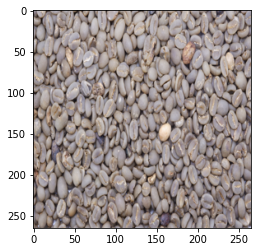

In [0]:
plt.imshow(image_list[20])

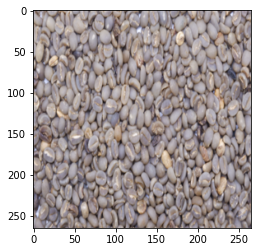

In [0]:
plt.imshow(image_list[200])

# Color Histogram

<function matplotlib.pyplot.show>

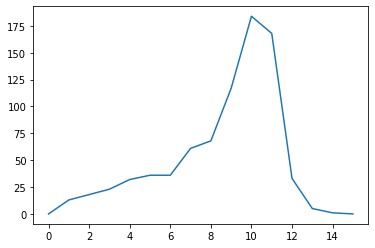

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[20], [0], None, [16], [0,256])
plt.plot(histr)
plt.show

<function matplotlib.pyplot.show>

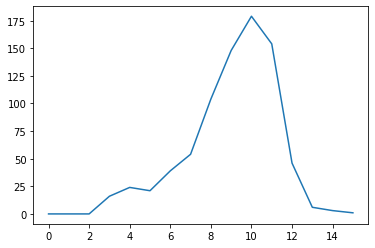

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[200], [1], None, [16], [0,256])
plt.plot(histr)
plt.show

<function matplotlib.pyplot.show>

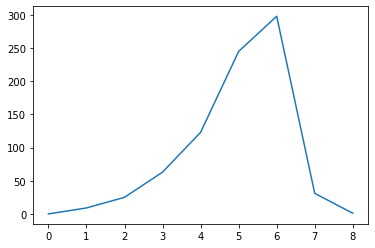

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[400], [2], None, [9], [0,256])
plt.plot(histr)
plt.show

In [0]:
histr.shape

(9, 1)

In [0]:
hist, bin_edges = np.histogram(histr, density=True)

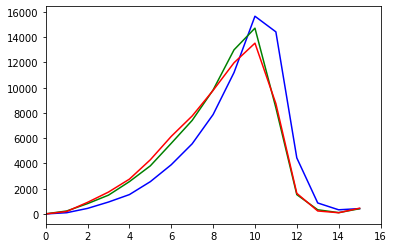

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([arrayImages[5]],[i],None,[16],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,16])
plt.show()

In [0]:
def getColorHistogram(rgb_image, channel):
  colHist = cv2.calcHist(rgb_image, [channel], None, [16], [0,256])
  (hist, _) = np.histogram(colHist, bins=16)
  return hist, colHist

In [0]:
listColHist = [] #list Color Histogram
listImgHist = [] #list image Color Histogram
redchannel = []
bluechannel = []
greenchannel = []
for image in arrayImages:
  chist_red, img = getColorHistogram(image, 0)
  chist_green, img = getColorHistogram(image, 1)
  chist_blue, img = getColorHistogram(image, 2)

  totalHist = np.concatenate((chist_red, chist_green))
  totalHist = np.concatenate((totalHist, chist_blue))

  listColHist.append((totalHist))
  listImgHist.append(img)
  redchannel.append(chist_red)
  bluechannel.append(chist_blue)
  greenchannel.append(chist_green)
  avg_allchannel
print("Jumlah Citra: ", len(listColHist))

Jumlah Citra:  900


[149.3998576  137.54635813 134.4358277 ]


<function matplotlib.pyplot.show>

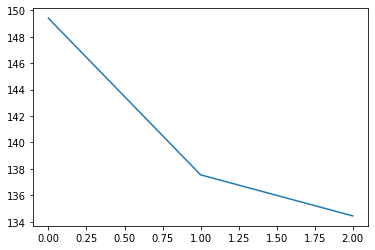

In [0]:
avg_color_per_row = np.average(arrayImages[20], axis=0)
avg_color = np.average(avg_color_per_row, axis=0)
print(avg_color)
plt.plot(avg_color)
plt.show

array([5.75      , 1.66444444, 1.18444444, 0.90555556, 0.82777778,
       0.64444444, 0.53333333, 0.44222222, 0.45666667, 0.43666667,
       0.41333333, 0.42666667, 0.38444444, 0.32111111, 0.32888889,
       1.28      ])

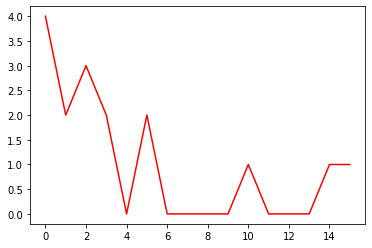

In [0]:
plt.plot(redchannel[20], "r")
plt.show
avg_red = np.average(redchannel, axis=0)
avg_red

array([5.74222222, 1.65777778, 1.17      , 0.9       , 0.81444444,
       0.63111111, 0.58111111, 0.47      , 0.42555556, 0.39444444,
       0.40222222, 0.44888889, 0.39888889, 0.32888889, 0.31666667,
       1.31777778])

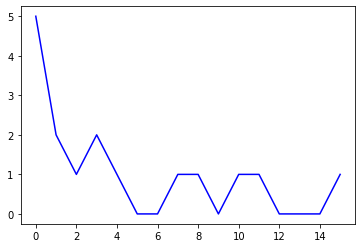

In [0]:
plt.plot(bluechannel[20], "blue")
plt.show
avg_blue = np.average(bluechannel, axis=0)
avg_blue

array([5.77555556, 1.64222222, 1.16333333, 0.95      , 0.76777778,
       0.64666667, 0.55555556, 0.46      , 0.43333333, 0.42222222,
       0.39555556, 0.42777778, 0.41444444, 0.34444444, 0.33111111,
       1.27      ])

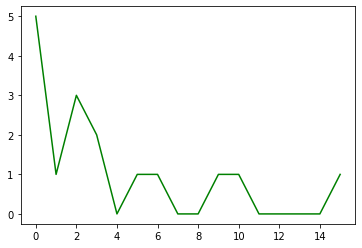

In [0]:
plt.plot(greenchannel[20], "green")
plt.show
avg_green = np.average(greenchannel, axis=0)
avg_green

In [0]:
256 * 3

768

In [0]:
np.array(listColHist).shape

(900, 48)

In [0]:
#nnti coba dlu pake satu gambar atau satu indeks ajah dlu

def getLBPimage(gray_image): #asalnya gray_image
  
  #input gray image = color image of shape(height, width)

  #output img: LBP converted image of the same shape as

  #step 0: step 0, Convert image to grayscall but already done
  #using the grayscalling = [] before the LBP

  #LBPimages = []
  
  #kalau img_gray gak bisa coba pakek image_list
  #grayscalling the image in index first
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  imgLBP = np.zeros_like(grayscalling)
  neighboor = 3 

  for imgHeight in range(0,gray_image.shape[0] - neighboor):
    for imgWidth in range(0,gray_image.shape[1] - neighboor):

      # Step1: 3 by 3 pixel
      # image_list = np.asarray(image_list)
      img           = grayscalling[imgHeight:imgHeight+neighboor, imgWidth:imgWidth+neighboor]
      center        = img[1,1]
      img01         = (img >= center)*1.0
      img01_vector  = img01.T.flatten() #make array become flat in one line (vector)

      # it is ok to order counterclock manner
      # img01_vector = img01.flatten()

      # Step 2: *Binary Operation
      img01_vector = np.delete(img01_vector,4)

      # Step 3 : Decimal: Convert the binary operated values to a digit
      where_img01_vector = np.where(img01_vector)[0]
      if len(where_img01_vector) >= 1:
        num = np.sum(2**where_img01_vector)
      else:
        num = 0
      imgLBP[imgHeight+1, imgWidth+1] = num
  
  return imgLBP



# LBP Using Library

In [0]:
from skimage.feature import local_binary_pattern
def getLBPimageScikit(gray_image):
  p = 8
  r = 1
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  lbp = local_binary_pattern(grayscalling, p, r, method = 'default')
  n_bins = int(lbp.max() + 1)
  (hist, _) = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density = True)
  return hist, lbp

In [0]:
listHistLBP = []
listImgLBP = []
for image in arrayImages:
    hist, img = getLBPimageScikit(image)
    listHistLBP.append((hist))
    listImgLBP.append(img)
print("Jumlah Citra: ", len(listHistLBP))

Jumlah Citra:  900


In [0]:
np.array(listHistLBP).shape

(900, 256)

(array([208.,  21.,  11.,   2.,   6.,   1.,   2.,   0.,   4.,   1.]),
 array([0.        , 0.00579708, 0.01159416, 0.01739124, 0.02318832,
        0.0289854 , 0.03478248, 0.04057957, 0.04637665, 0.05217373,
        0.05797081]),
 <a list of 10 Patch objects>)

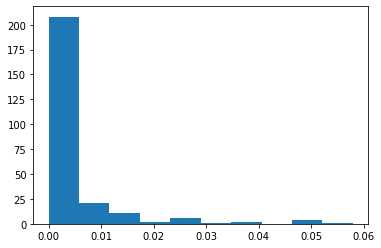

In [0]:
plt.hist(listHistLBP[20])

(array([214.,  14.,  11.,   3.,   6.,   3.,   1.,   0.,   1.,   3.]),
 array([0.        , 0.00598362, 0.01196725, 0.01795087, 0.0239345 ,
        0.02991812, 0.03590174, 0.04188537, 0.04786899, 0.05385262,
        0.05983624]),
 <a list of 10 Patch objects>)

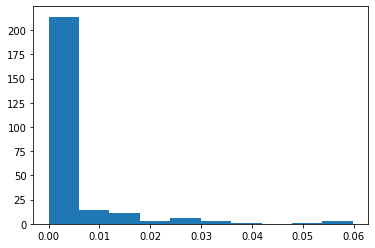

In [0]:
plt.hist(listHistLBP[189])

In [0]:
np.array(listColHist).shape

(900, 48)

In [0]:
listFeature = np.concatenate((listHistLBP, listColHist), axis=1)

In [0]:
listFeature.shape

(900, 304)

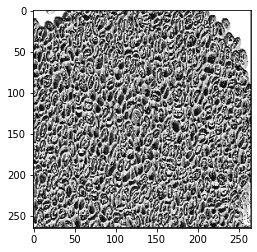

In [0]:
plt.imshow(listImgLBP[0], cmap="gray")

# Random Forrest Classifier

In [0]:
# coba satuin list histogram LBP sama Histogram Color
# imagesHist = listColHist, listHistLBP

### LBP Parameter





In [0]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


#### Training LBP Random Forrest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)


#print("Akurasi", accuracy_score(y_test, y_pred))
#coba data train
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.802653399668325


#### Testing LBP Random Forrest 

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)


#print("Akurasi", accuracy_score(y_test, y_pred))
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.8181818181818182


### Try Only using Histogram Parameter

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listColHist, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


#### Training Histogram using Random Forrest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 1.0


### Testing Histogram using Random Forrest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.39730639730639733


#### Training Concatenate Histogram + LBP using Random Forrest

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.7893864013266998


#### Testing concatenate Histogram + LBP using Random Forrest

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 1.0


# KNN Classifier

In [0]:
from sklearn.model_selection import train_test_split

### Training LBP using KNN

In [0]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.9203980099502488


Testing LBP using KNN

In [0]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_test, y_test)
print("Akurasi KNN = ", neigh.score(X_test, y_test))

Akurasi KNN =  0.8653198653198653


### Color histogram using KNN

#### Training Color Histogram using KNN

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listColHist, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)


#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.5356550580431177


#### Testing Color Histogram using KNN 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listColHist, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_test, y_test)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_test,y_test))

Akurasi KNN = 0.48484848484848486


#### Training Concate using KNN

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.5356550580431177


#### Testing Concate using KNN

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_test, y_test)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_test,y_test))

Akurasi KNN = 0.5824915824915825


# SVM Classifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn import svm
clf = svm.SVC(gamma="auto")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [0]:
from sklearn import metrics
print("Accuracy SVM: ", metrics.accuracy_score(y_test, y_pred))

Accuracy SVM:  0.3016759776536313


# ANN Classifier

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical, plot_model

In [0]:
input_shape = (256, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2048)              526336    
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [0]:
#label[label == 3] = 0

label

# 0 1 2

0      0
1      0
2      0
3      0
4      0
      ..
895    4
896    4
897    4
898    4
899    4
Name: label, Length: 900, dtype: int64

In [0]:
y = to_categorical(label, num_classes=5)

In [0]:
print(y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [0]:
listHistLBP_new = np.array(listHistLBP)
listHistLBP_new.shape

# 1 2 3 => dibaca 4 kelas karna mulai 0
# 0 1 2

(900, 256)

In [0]:
listColHist_new = np.array(listColHist)
listColHist_new.shape

(900, 768)

## ANN with LBP feature

---



### Training LBP using ANN

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listHistLBP_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 60ms/step - loss: 1.6106 - accuracy: 0.1785 - val_loss: 1.6153 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 0s 42ms/step - loss: 1.6068 - accuracy: 0.2424 - val_loss: 1.6267 - val_accuracy: 0.1791
Epoch 3/1000
10/10 [==============================] - 0s 42ms/step - loss: 1.6045 - accuracy: 0.2424 - val_loss: 1.6300 - val_accuracy: 0.1791
Epoch 4/1000
10/10 [==============================] - 0s 42ms/step - loss: 1.6018 - accuracy: 0.2357 - val_loss: 1.6163 - val_accuracy: 0.1791
Epoch 5/1000
10/10 [==============================] - 0s 41ms/step - loss: 1.5989 - accuracy: 0.2290 - val_loss: 1.6139 - val_accuracy: 0.1791
Epoch 6/1000
10/10 [==============================] - 0s 44ms/step - loss: 1.5994 - accuracy: 0.2391 - val_loss: 1.6109 - val_accuracy: 0.1791
Epoch 7/1000
10/10 [==============================] - 0s 42ms/step - loss: 1.5878 - accuracy: 0.2424 - val_loss: 1.5891 - val_accuracy: 0.1824

#### Testing LBP using ANN

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listHistLBP_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
19/19 [==============================] - 1s 49ms/step - loss: 0.7299 - accuracy: 0.6501 - val_loss: 0.4679 - val_accuracy: 0.8081
Epoch 2/1000
19/19 [==============================] - 1s 34ms/step - loss: 0.7068 - accuracy: 0.6866 - val_loss: 0.4867 - val_accuracy: 0.8316
Epoch 3/1000
19/19 [==============================] - 1s 34ms/step - loss: 0.6131 - accuracy: 0.7214 - val_loss: 0.4358 - val_accuracy: 0.8451
Epoch 4/1000
19/19 [==============================] - 1s 34ms/step - loss: 0.6429 - accuracy: 0.7015 - val_loss: 0.4377 - val_accuracy: 0.8620
Epoch 5/1000
19/19 [==============================] - 1s 33ms/step - loss: 0.6466 - accuracy: 0.6932 - val_loss: 0.4581 - val_accuracy: 0.8620
Epoch 6/1000
19/19 [==============================] - 1s 35ms/step - loss: 0.6637 - accuracy: 0.7048 - val_loss: 0.4556 - val_accuracy: 0.8249
Epoch 7/1000
19/19 [==============================] - 1s 35ms/step - loss: 0.6004 - accuracy: 0.7330 - val_loss: 0.4158 - val_accuracy: 0.8653

## ANN with Color Histogram

In [0]:
input_shape = (768, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2048)              1574912   
_________________________________________________________________
dropout_12 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 5)                

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listColHist_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
19/19 [==============================] - 1s 49ms/step - loss: 8.9859 - accuracy: 0.2139 - val_loss: 2.8409 - val_accuracy: 0.2963
Epoch 2/1000
19/19 [==============================] - 1s 64ms/step - loss: 3.8015 - accuracy: 0.2769 - val_loss: 1.7302 - val_accuracy: 0.3401
Epoch 3/1000
19/19 [==============================] - 1s 44ms/step - loss: 2.3695 - accuracy: 0.3101 - val_loss: 1.4663 - val_accuracy: 0.3367
Epoch 4/1000
19/19 [==============================] - 1s 43ms/step - loss: 1.9064 - accuracy: 0.3317 - val_loss: 1.4032 - val_accuracy: 0.3468
Epoch 5/1000
19/19 [==============================] - 1s 43ms/step - loss: 1.6768 - accuracy: 0.3648 - val_loss: 1.4252 - val_accuracy: 0.3266
Epoch 6/1000
19/19 [==============================] - 1s 43ms/step - loss: 1.5331 - accuracy: 0.4013 - val_loss: 1.3885 - val_accuracy: 0.2963
Epoch 7/1000
19/19 [==============================] - 1s 43ms/step - loss: 1.4624 - accuracy: 0.4129 - val_loss: 1.3811 - val_accuracy: 0.3434

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listColHist_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 64ms/step - loss: 21.3864 - accuracy: 0.3165 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2/1000
10/10 [==============================] - 1s 57ms/step - loss: 10.4438 - accuracy: 0.3064 - val_loss: 0.1103 - val_accuracy: 0.9635
Epoch 3/1000
10/10 [==============================] - 1s 57ms/step - loss: 4.5395 - accuracy: 0.2896 - val_loss: 1.1646 - val_accuracy: 0.6153
Epoch 4/1000
10/10 [==============================] - 1s 55ms/step - loss: 3.7226 - accuracy: 0.3300 - val_loss: 1.6962 - val_accuracy: 0.4345
Epoch 5/1000
10/10 [==============================] - 1s 56ms/step - loss: 2.8978 - accuracy: 0.3098 - val_loss: 1.5451 - val_accuracy: 0.4627
Epoch 6/1000
10/10 [==============================] - 1s 53ms/step - loss: 2.2305 - accuracy: 0.3165 - val_loss: 1.2948 - val_accuracy: 0.5058
Epoch 7/1000
10/10 [==============================] - 1s 54ms/step - loss: 1.9413 - accuracy: 0.3401 - val_loss: 1.1544 - val_accuracy: 0.53

ANN For Concate Methods

In [0]:
input_shape = (1024, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(listFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))